In [1]:
#pip install svgling polyglot pyicu pycld2 morfessor langdetect transformers bert-extractive-summarizer flair spacy-transformers

#pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_md-3.0.0/en_core_web_md-3.0.0.tar.gz
#pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_trf-3.0.0/en_core_web_trf-3.0.0.tar.gz
#pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_lg-3.0.0/en_core_web_lg-3.0.0.tar.gz

In [7]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer # Sentiment #sent
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import sent_tokenize, word_tokenize #sent
from nltk.corpus import stopwords
from nltk.chunk import ne_chunk
from nltk.tree import Tree
import nltk
from collections import Counter
from tqdm import tqdm #sent

from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary
from gensim.models.tfidfmodel import TfidfModel
from gensim.models import LdaModel
from gensim import corpora, models

import svgling

import spacy
from spacy.matcher import Matcher
from spacy.matcher import PhraseMatcher
from spacy.tokens import Doc, Span

from textblob import TextBlob

from summarizer import Summarizer

from scipy.interpolate import UnivariateSpline # sent
import pandas as pd # sent
import numpy as np # sent
import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from transformers import pipeline #sent
import flair #sent

In [9]:
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

#nlp = spacy.load("en_core_web_sm")


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Florenzio\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Florenzio\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Florenzio\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Florenzio\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\Florenzio\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Florenzio\AppData\Roaming\nltk_data...
[nltk_data]   Pack

RegistryError: [E892] Unknown function registry: 'vectors'.

Available names: architectures, augmenters, batchers, callbacks, cli, datasets, displacy_colors, factories, initializers, languages, layers, lemmatizers, loggers, lookups, losses, misc, models, ops, optimizers, readers, schedules, tokenizers

In [10]:
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer() #sent
nlp_transformers = pipeline("sentiment-analysis") #sent
flair_sentiment = flair.models.TextClassifier.load('en-sentiment') #sent

sns.set_style("darkgrid")

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Florenzio\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

C:\Users\Florenzio\AppData\Roaming\Python\Python38\site-packages\huggingface_hub\file_download.py:148: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Florenzio\.cache\huggingface\hub\models--distilbert--distilbert-base-uncased-finetuned-sst-2-english. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

2024-04-13 11:20:32,898 https://nlp.informatik.hu-berlin.de/resources/models/sentiment-curated-distilbert/sentiment-en-mix-distillbert_4.pt not found in cache, downloading to C:\Users\FLOREN~1\AppData\Local\Temp\tmpa2nqw9f2


100%|██████████| 253M/253M [00:40<00:00, 6.53MB/s] 

2024-04-13 11:21:13,844 copying C:\Users\FLOREN~1\AppData\Local\Temp\tmpa2nqw9f2 to cache at C:\Users\Florenzio\.flair\models\sentiment-en-mix-distillbert_4.pt


2024-04-13 11:21:27,197 removing temp file C:\Users\FLOREN~1\AppData\Local\Temp\tmpa2nqw9f2


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [3]:
text = """
In the distant future, Duke Leto Atreides, ruler of the planet Caladan, is assigned by the Padishah Emperor Shaddam IV to replace Baron Vladimir Harkonnen as the fiefholder of Arrakis, a harsh desert planet and sole source of "spice", a valuable psychotropic substance that imparts heightened vitality and awareness. Spice is key to interstellar travel, giving Spacing Guild Navigators the ability to guide starships to traverse space instantaneously and safely. Shaddam plots for House Harkonnen to retake Arrakis, secretly aided by his Sardaukar troops, to destroy House Atreides. Leto is suspicious of the Emperor but weighs the risks against the power of controlling Arrakis and making an alliance with its mysterious natives, the Fremen.

Leto's concubine, Lady Jessica, is an acolyte of the Bene Gesserit, an exclusive sisterhood whose members possess advanced physical and mental abilities. As part of their centuries-long breeding program, they instructed her to bear a daughter whose son would become the Kwisatz Haderach, a Bene Gesserit and messianic superbeing with the clairvoyance necessary to guide humanity to a better future. However, she disobeyed and bore a son, Paul. Throughout his life, he is trained by Leto's aides, Duncan Idaho, Gurney Halleck, Suk doctor Wellington Yueh, and the Mentat Thufir Hawat, while Jessica teaches him Bene Gesserit disciplines. Paul confides in Jessica and Duncan that he is troubled by visions of the future. In response to Paul's increasing prescience, the Reverend Mother and Imperial Truthsayer Gaius Helen Mohiam visits Caladan and subjects him to a death-alternative test to assess his humanity and impulse control, which he passes. Mohiam insists that Baron Harkonnen spare Paul and Jessica during his coup, to which he duplicitously agrees.

House Atreides arrives at Arrakeen, the fortress stronghold on Arrakis. Duncan's advance party has made contact with the Fremen. The natives revere Paul and Jessica, which Jessica explains is due to the Bene Gesserit sowing beliefs on Arrakis centuries earlier. Leto negotiates with Fremen chieftain, Stilgar, and meets the Imperial Judge of the Change, Dr. Kynes, a planetologist who lives among the Fremen. Kynes briefs them on the dangers of spice harvesting, and the giant sandworms which travel under the desert and make the use of protective Holtzman shields unwise. During a flight, they dramatically rescue a stranded spice-harvesting crew from a sandworm; Paul's exposure to the spice triggers intense premonitions.

An attempt to assassinate Paul with a hunter-seeker fails. Yueh betrays the Atreides and disables Arrakeen's shields, allowing the Harkonnens and Sardaukar to invade. He incapacitates Leto, planning to exchange him for his wife, who is the Baron's prisoner. Yueh replaces one of Leto's teeth with a poison gas capsule with which the Duke can assassinate the Baron. Leto releases the gas, killing himself and the Baron's Mentat, Piter De Vries, but the Baron survives. Though the Baron has arranged to have Paul and Jessica dropped deep in the desert to die, a compassionate Yueh has left them with stillsuits and other survival supplies. Jessica uses a Bene Gesserit technique called "the Voice" to overpower and kill their captors. Paul and Jessica journey overnight in the desert where Paul, surrounded by spice, has visions of a bloody "holy war" fought across the universe in his name.

Baron Harkonnen gives command of Arrakis to his nephew, Rabban, and orders him to restart spice production to recoup the cost of the invasion. Paul and Jessica are found by Duncan and Kynes, and Paul discloses his plan to marry one of Shaddam's daughters to avert the civil war that would ensue from news of the Emperor's treachery. They are found by the Sardaukar, and Duncan sacrifices himself to allow Paul and Jessica to escape. Kynes is mortally wounded by Sardaukar but summons a sandworm that devours them. In the deep desert, Paul and Jessica encounter Stilgar's tribe, including Chani, the girl in Paul's visions. Fremen warrior Jamis opposes Stilgar's lenience to them and challenges Paul to a ritual duel to the death, which Paul wins. Against Jessica's wishes, Paul joins the Fremen to fulfill his father's goal of bringing peace to Arrakis.
"""

In [4]:
# Basic tokenization
tokens_base_tot = [word for word in word_tokenize(text)]
tokens_base_sent = [word_tokenize(sentence) for sentence in sent_tokenize(text)]

# Lower case tokenization
tokens_tot = [word for word in word_tokenize(text.lower())]
tokens_sent = [word_tokenize(sentence.lower()) for sentence in sent_tokenize(text)]

In [5]:
# Remove stopwords and non-alphanumeric tokens
no_stops_tot = [word for word in tokens_tot if (word not in stopwords.words('english') and word.isalpha())]
no_stops_sent = [[word for word in sentence if (word not in stopwords.words('english')) and word.isalpha()] for sentence in tokens_sent]

In [6]:
# Lemmatization
lemmatizer = WordNetLemmatizer()

lemmatized_tot = [lemmatizer.lemmatize(word) for word in no_stops_tot]
lemmatized_sent = [[lemmatizer.lemmatize(word) for word in sentence] for sentence in no_stops_sent]

In [7]:
# Most common words (for the whole speech)
counter = Counter(lemmatized_tot)

counter.most_common(5)

[('paul', 18), ('jessica', 13), ('leto', 8), ('baron', 8), ('arrakis', 7)]

In [8]:
#### Tf-idf ####
# Make a dictionary from the extracted tokens
dictionary = Dictionary(lemmatized_sent)

# Make a corpus from the extracted tokens
corpus = [dictionary.doc2bow(doc) for doc in lemmatized_sent]

# Make a tf_idf analysis from the corpus
tfidf = TfidfModel(corpus)

In [9]:
tfidf_dict = dict()

for ind, elem in enumerate(corpus):
    tfidf_dict[ind] = [dictionary[id] for id, score in sorted(tfidf[elem], key = lambda x: x[1], reverse = True)[:3]]

In [10]:
pd.DataFrame(tfidf_dict.values(), columns = ("Best_1", "Best_2", "Best_3"))

,Best_1,Best_2,Best_3
0,planet,assigned,awareness
1,giving,guild,instantaneously
2,house,aided,destroy
3,alliance,controlling,making
4,acolyte,advanced,concubine
5,bear,become,better
6,bore,disobeyed,however
7,aide,discipline,doctor
8,confides,troubled,future
9,ass,control,gaius


In [11]:
# Extrapolate the tags from the extracted tokens
tagged = [nltk.pos_tag(sentence) for sentence in tokens_base_sent]

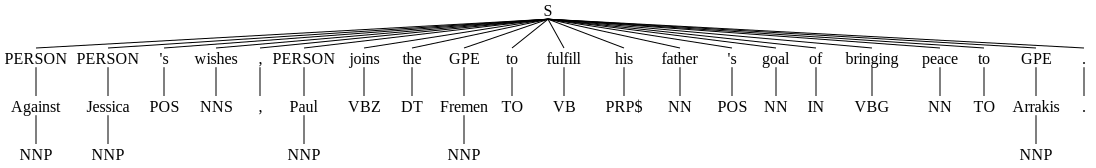

In [12]:
nltk.ne_chunk(tagged[-1])

In [13]:
person_names = list()
place_names = list()
money_values = list()
time_values = list()
date_values = list()

for tag_sentence in tagged:
    named_entities = ne_chunk(tag_sentence)

    for entity in named_entities:
        if isinstance(entity, Tree):
            label = entity.label()
            entity_name = ' '.join([word for word, tag in entity.leaves()])

            if label == 'PERSON':
                person_names.append(entity_name)
            elif label in ['GPE', 'LOCATION']:
                place_names.append(entity_name)
            elif label == 'MONEY':
                money_values.append(entity_name)
            elif label == 'TIME':
                time_values.append(entity_name)
            elif label == 'DATE':
                date_values.append(entity_name)

set(person_names), set(place_names), set(money_values), set(time_values), set(date_values)

({'Against',
  'Arrakeen',
  'Arrakis',
  'Baron',
  'Baron Harkonnen',
  'Baron Vladimir Harkonnen',
  'Bene Gesserit',
  'Chani',
  'Duke Leto Atreides',
  'Duncan Idaho',
  'Gurney Halleck',
  'Harkonnen',
  'Jamis',
  'Jessica',
  'Kynes',
  'Lady Jessica',
  'Leto',
  'Mentat',
  'Mohiam',
  'Paul',
  'Piter De Vries',
  'Sardaukar',
  'Shaddam',
  'Stilgar',
  'Suk',
  'Wellington Yueh',
  'Yueh'},
 {'Arrakis',
  'Baron',
  'Caladan',
  'Duncan',
  'Fremen',
  'Jessica',
  'Leto',
  'Paul',
  'Rabban',
  'Sardaukar',
  'Shaddam',
  'Spice',
  'Stilgar',
  'Yueh'},
 set(),
 set(),
 set())

In [14]:
spacy.explain("GPE")

'Countries, cities, states'

In [15]:
# Extract the entities from the sentence
doc = nlp(text)

# Print the entities and their tags
for word in doc.ents:
    print("{}: {}".format(word, word.label_))

Leto Atreides: PERSON
Caladan: GPE
Shaddam IV: PERSON
Vladimir Harkonnen: PERSON
Arrakis: GPE
Spacing Guild: ORG
Shaddam: PERSON
House Harkonnen: ORG
Arrakis: GPE
Sardaukar: PERSON
House Atreides: ORG
Arrakis: PERSON
Leto: PERSON
Lady Jessica: PERSON
Bene Gesserit: PERSON
centuries: DATE
Kwisatz Haderach: PERSON
Bene Gesserit: PERSON
Paul: PERSON
Leto: PERSON
Duncan Idaho: PERSON
Gurney Halleck: PERSON
Suk: GPE
Wellington Yueh: PERSON
the Mentat Thufir Hawat: ORG
Jessica: PERSON
Bene Gesserit: PERSON
Paul: PERSON
Jessica: PRODUCT
Duncan: PERSON
Paul: PERSON
the Reverend Mother: ORG
Imperial Truthsayer Gaius Helen Mohiam: PERSON
Caladan: GPE
Mohiam: PERSON
Harkonnen: PERSON
Paul: PERSON
Jessica: PERSON
House Atreides: ORG
Arrakeen: GPE
Arrakis: GPE
Duncan: PERSON
Fremen: WORK_OF_ART
Paul: PERSON
Jessica: PRODUCT
Jessica: PERSON
Bene Gesserit: PERSON
Arrakis centuries earlier: DATE
Stilgar: PERSON
Imperial: ORG
Kynes: PERSON
Kynes: ORG
Holtzman: PERSON
Paul: PERSON
Paul: PERSON
Atreides:

In [16]:
# Print the entities and their tags
for word in doc:
    print("{}: {}\t{}\t{}".format(word.text, word.pos_, word.dep_, word.head.text))


: SPACE	dep	In
In: ADP	prep	assigned
the: DET	det	future
distant: ADJ	amod	future
future: NOUN	pobj	In
,: PUNCT	punct	assigned
Duke: PROPN	compound	Atreides
Leto: PROPN	compound	Atreides
Atreides: PROPN	nsubjpass	assigned
,: PUNCT	punct	Atreides
ruler: NOUN	appos	Atreides
of: ADP	prep	ruler
the: DET	det	planet
planet: NOUN	pobj	of
Caladan: PROPN	appos	planet
,: PUNCT	punct	Atreides
is: AUX	auxpass	assigned
assigned: VERB	ROOT	assigned
by: ADP	agent	assigned
the: DET	det	IV
Padishah: PROPN	compound	Emperor
Emperor: PROPN	compound	IV
Shaddam: PROPN	compound	IV
IV: PROPN	pobj	by
to: PART	aux	replace
replace: VERB	xcomp	assigned
Baron: PROPN	compound	Harkonnen
Vladimir: PROPN	compound	Harkonnen
Harkonnen: PROPN	dobj	replace
as: ADP	prep	replace
the: DET	det	fiefholder
fiefholder: NOUN	pobj	as
of: ADP	prep	fiefholder
Arrakis: PROPN	pobj	of
,: PUNCT	punct	Arrakis
a: DET	det	planet
harsh: ADJ	amod	planet
desert: NOUN	compound	planet
planet: NOUN	appos	Arrakis
and: CCONJ	cc	planet
sole: ADJ	a

In [17]:
# Assuming nlp is already loaded with 'en_core_web_md' or 'en_core_web_lg'
matcher = Matcher(nlp.vocab)

# Write a pattern for the words "golden" followed by "retriever"
pattern = [{'LOWER': 'golden'}, {'LOWER': 'retriever'}]

matcher.add("DOG", patterns=[pattern])

doc = nlp("I have a Golden Retriever")

matches = matcher(doc)

for match_id, start, end in matches:
    span = doc[start: end]
    print("Matched span", span.text)
    print("Root token:", span.root.text)
    print("Root head token:", span.root.head.text)
    print("Previous token:", doc[start - 1].text, doc[start - 1].pos_)

Matched span Golden Retriever
Root token: Retriever
Root head token: have
Previous token: a DET


In [18]:
doc.cats

{}

In [19]:
matcher = PhraseMatcher(nlp.vocab)
pattern = nlp("Golen Retriever")
matcher.add("DOG", None, pattern)

doc = nlp("I have a Golden Retriever")

for match_id, start, end in matches:
    span = doc[start: end]
    print("Matched span", span.text)

Matched span Golden Retriever


In [20]:
for elem in doc[1].ancestors: print(elem)

In [21]:
set([ent.label_ for ent in doc.ents])

{'WORK_OF_ART'}

In [22]:
# Define included_entities
include_entities = ['DATE', 'PERSON', "GPE", "ORG"]

# Define extract_entities()
def extract_entities(text, doc):
    # Create a dict to hold the entities
    ents = {key: set() for key in include_entities}
    # Create a spacy document
    for ent in doc.ents:
        if ent.label_ in include_entities:
            # Save interesting entities
            ents[ent.label_].add(ent.text)
    return ents

extract_entities(text, doc)

{'DATE': set(), 'PERSON': set(), 'GPE': set(), 'ORG': set()}

In [23]:
lexeme = nlp.vocab["distant"]
lexeme

In [24]:
words = ["Hello", "World", "!"]
spaces = [True, False, False]

doc = Doc(nlp.vocab, words = words, spaces = spaces)
span = Span(doc, 0, 2)

span_with_label = Span(doc, 0, 2, label = "GREETING")

doc.ents = [span_with_label]

print(doc.text)

Hello World!


In [26]:
# Similarity level between two documents
#nlp = spacy.load("en_core_web_md")

doc1 = nlp("I like fast food")
token = nlp("soap")[0]

doc1.similarity(token) # This uses the SpaCy mode, so it takes into account context similarity and not just raw word similarity

<ipython-input-26-5771d69acec4>:7: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  doc1.similarity(token) # This uses the SpaCy mode, so it takes into account context similarity and not just raw word similarity


0.32129074886439263

In [27]:
# Similarity level between a document and a token
doc1 = nlp("I like fast food")
doc2 = nlp("I like pizza")

doc1.similarity(doc2)

<ipython-input-27-b6b0d17cd7e8>:5: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  doc1.similarity(doc2)


0.7441097936586792

In [28]:
# Similarity level between a document and a span
doc1 = nlp("I like fast food and in general junk food")[2:5]
doc2 = nlp("I like to eat healthy")

doc1.similarity(doc2)

<ipython-input-28-217bba52a1a1>:5: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Span.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  doc1.similarity(doc2)


0.03546697646662776

In [29]:
# Similarity cannot be aware of the sentiment
# Both sentences are similar, since they talk about cats and about the fact they could be liked or not
# However, the two sentences have opposite sentiments
doc1 = nlp("I like cats")
doc2 = nlp("I hate cats")

doc1.similarity(doc2)

<ipython-input-29-2a7bcbfb68d9>:7: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  doc1.similarity(doc2)


0.7395628607112026

In [30]:
# RASA NLU

In [31]:
# Topic modeling
dictionary = corpora.Dictionary(lemmatized_sent)
corpus = [dictionary.doc2bow(text) for text in lemmatized_sent]
ldamodel = models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)
topics = ldamodel.print_topics(num_words=5)

In [32]:
data = list()
for topic, words in topics:
    words = words.split(" + ")
    row = [topic]
    for word in words:
        weight, keyword = word.split("*")
        row.extend([keyword.strip('"'), float(weight)])
    data.append(row)

df = pd.DataFrame(data)
df

,0,1,2,3,4,5,6,7,8,9,10
0,0,paul,0.038,desert,0.020,atreides,0.020,shield,0.020,arrakeen,0.020
1,1,arrakis,0.031,jessica,0.031,fremen,0.016,bene,0.016,gesserit,0.016
2,2,paul,0.054,jessica,0.031,duncan,0.024,found,0.016,war,0.016
3,3,baron,0.040,leto,0.034,jessica,0.027,paul,0.021,yueh,0.014
4,4,spice,0.020,harkonnen,0.014,guide,0.014,house,0.014,humanity,0.014


# Sentiment analysis

## TextBlob

In [33]:
def sentiment_analysis_glob(text):
    # Sentiment (global)

    sentiment_1 = TextBlob(text).sentiment[0] # TextBlob

    sentiment_2 = sia.polarity_scores(text)["compound"] # NLTK Vader

    try:
        transformers_result = nlp_transformers(text)[0] # BERT
        label_value = 1 if transformers_result['label'] == "POSITIVE" else -1
        sentiment_3 = label_value * transformers_result['score']
    except:
        sentiment_3 = 0

    text_an = flair.data.Sentence(text) # Flair
    flair_sentiment.predict(text_an)
    label_value = 1 if text_an.labels[0].value == "POSITIVE" else -1
    sentiment_4 = label_value * text_an.labels[0].score
    sentiment = 0.35 * sentiment_1 + 0.35 * sentiment_2 + 0.15 * sentiment_3 + 0.15 * sentiment_4
    #sentiment = (sentiment_1 + sentiment_2) / 2

    return sentiment

In [34]:
def sentiment_analysis(text):
    # Sentiment (sentence by sentence)
    sent_trend = list()
    for sentence in tqdm(sent_tokenize(text)):
            sentiment_1 = TextBlob(sentence).sentiment[0] # TextBlob

            sentiment_2 = sia.polarity_scores(sentence)["compound"] # NLTK Vader

            transformers_result = nlp_transformers(sentence)[0] # BERT
            label_value = 1 if transformers_result['label'] == "POSITIVE" else -1
            sentiment_3 = label_value * transformers_result['score']

            sentence_an = flair.data.Sentence(sentence) # Flair
            flair_sentiment.predict(sentence_an)
            label_value = 1 if sentence_an.labels[0].value == "POSITIVE" else -1
            sentiment_4 = label_value * sentence_an.labels[0].score
            sentiment = 0.35 * sentiment_1 + 0.35 * sentiment_2 + 0.15 * sentiment_3 + 0.15 * sentiment_4
            #sentiment = (sentiment_1 + sentiment_2) / 2
            sent_trend.append((sentence, sentiment))

    sent_trend_df = pd.DataFrame(sent_trend, columns = ("sentence", "sentiment"))
    sent_trend_df['EMA'] = sent_trend_df['sentiment'].ewm(span = 15, adjust=False).mean()

    return sent_trend_df

In [35]:
def sliding_window(input_list, window_size):
    windows = list()
    for i in range(len(input_list)):
        start = max(0, i - window_size + 1)
        end = i + 1
        windows.append(input_list[start:end])

    return windows

In [36]:
tokens = sent_tokenize(text)

window_size = max(len(tokens), 5)
result = sliding_window(sent_tokenize(text), window_size)

In [37]:
sent_trend_df = sentiment_analysis(text)
sent_glob = [sentiment_analysis_glob(" ".join(subset)) for subset in tqdm(result)]

100%|██████████| 32/32 [00:43<00:00,  1.35s/it]


In [38]:
sent_trend_df["global_sentiment"] = sent_glob

In [39]:
sent_trend_df["corrected_sentiment"] = 0.5 * sent_trend_df["sentiment"] + 0.5 * sent_trend_df["global_sentiment"]

<ipython-input-40-6739cc1ff8b6>:7: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(plt.cm.ScalarMappable(cmap = "RdYlGn"), label = "Value")


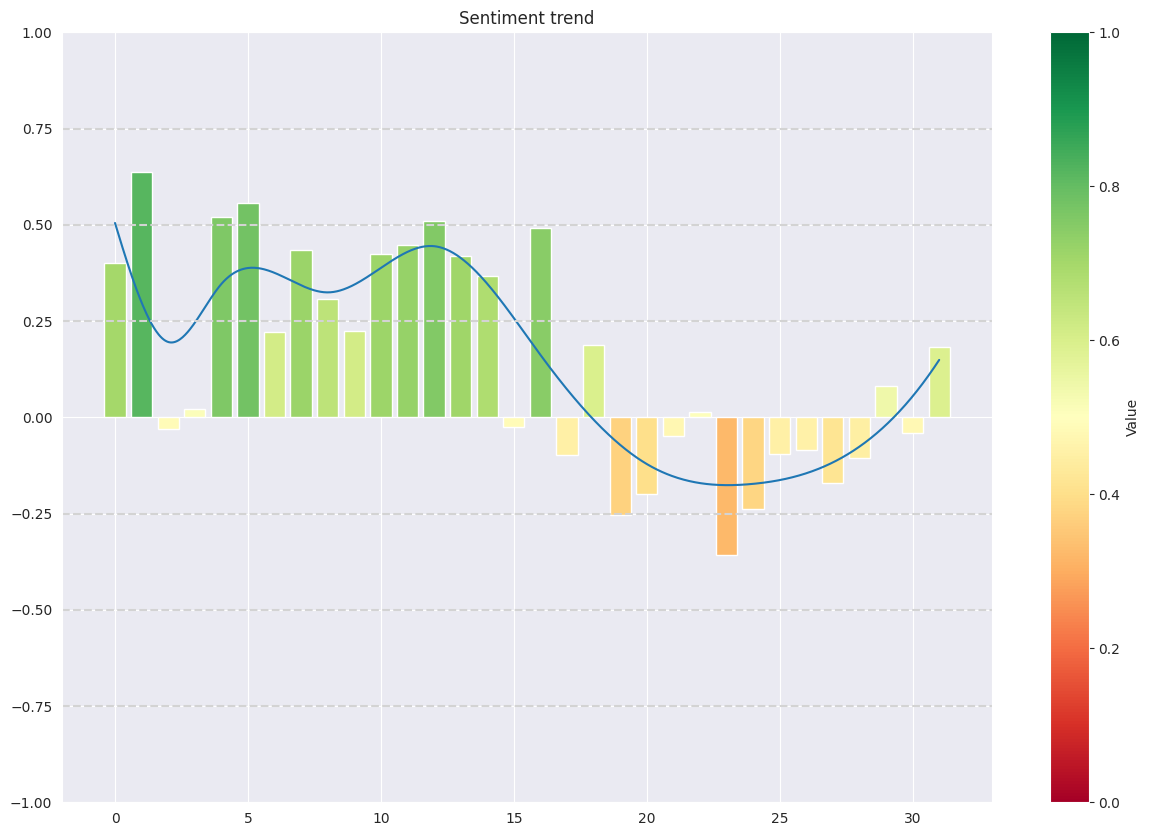

In [40]:
plt.figure(figsize = (15, 10))

colors = plt.cm.RdYlGn((np.array(sent_trend_df.corrected_sentiment) + 1) / 2.)

plt.bar(range(sent_trend_df.shape[0]), sent_trend_df.corrected_sentiment, color = colors)

plt.colorbar(plt.cm.ScalarMappable(cmap = "RdYlGn"), label = "Value")

# Spline
y = sent_trend_df.corrected_sentiment
x = np.arange(len(y))
spline = UnivariateSpline(x, y, s = 0.75)
x_smooth = np.linspace(x.min(), x.max(), 1000)
y_smooth = spline(x_smooth)

plt.plot(x_smooth, y_smooth)

values = [-0.75, -0.5, -0.25, 0.25, 0.5, 0.75]

for value in values:
    plt.axhline(y=value, color='lightgray', linestyle='--')

plt.ylim((-1, 1))
plt.title("Sentiment trend")
plt.show()

In [41]:
for sentence in sent_trend_df.sort_values("corrected_sentiment")[:5]["sentence"]:
    print(sentence + "\n")

Jessica uses a Bene Gesserit technique called "the Voice" to overpower and kill their captors.

He incapacitates Leto, planning to exchange him for his wife, who is the Baron's prisoner.

Paul and Jessica journey overnight in the desert where Paul, surrounded by spice, has visions of a bloody "holy war" fought across the universe in his name.

Yueh replaces one of Leto's teeth with a poison gas capsule with which the Duke can assassinate the Baron.

They are found by the Sardaukar, and Duncan sacrifices himself to allow Paul and Jessica to escape.



In [42]:
for sentence in sent_trend_df.sort_values("corrected_sentiment", ascending = False)[:5]["sentence"]:
    print(sentence + "\n")

Spice is key to interstellar travel, giving Spacing Guild Navigators the ability to guide starships to traverse space instantaneously and safely.

As part of their centuries-long breeding program, they instructed her to bear a daughter whose son would become the Kwisatz Haderach, a Bene Gesserit and messianic superbeing with the clairvoyance necessary to guide humanity to a better future.

Leto's concubine, Lady Jessica, is an acolyte of the Bene Gesserit, an exclusive sisterhood whose members possess advanced physical and mental abilities.

Duncan's advance party has made contact with the Fremen.

During a flight, they dramatically rescue a stranded spice-harvesting crew from a sandworm; Paul's exposure to the spice triggers intense premonitions.



# Spoken language processing

In [43]:
!wget https://www.signalogic.com/melp/EngSamples/Orig/male.wav

import tarfile

--2024-03-20 16:10:42--  https://www.signalogic.com/melp/EngSamples/Orig/male.wav
Resolving www.signalogic.com (www.signalogic.com)... 209.150.126.178
Connecting to www.signalogic.com (www.signalogic.com)|209.150.126.178|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 816496 (797K) [audio/x-wav]
Saving to: ‘male.wav’

male.wav            100%[===================>] 797.36K  --.-KB/s    in 0.1s    

2024-03-20 16:10:43 (7.08 MB/s) - ‘male.wav’ saved [816496/816496]



In [44]:
!pip install SpeechRecognition
!pip install pydub
from pydub.playback import play

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 14.1 MB/s eta 0:00:00


In [45]:
# To play audio
!pip install simpleaudio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 9.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for simpleaudio: filename=simpleaudio-1.0.4-cp310-cp310-linux_x86_64.whl size=2054402 sha256=cf978913d3da17c889e59dfe4022926663a7863ab59d7710825b8d09c5af20b8
  Stored in directory: /root/.cache/pip/wheels/10/70/ed/8c41675109565c2c65c3ac40d20859fc9d3f93a8efbb11d1c7
Successfully built simpleaudio


In [46]:
import wave
import numpy as np
import matplotlib.pyplot as plt
import speech_recognition as sr
from pydub import AudioSegment

audiofile = "male.wav"

In [47]:
as_file = AudioSegment.from_file(file = audiofile) # For format different from wav, it would be necessary to use ffmpeg

as_file.channels # 1 for mono, 2 for stereo
as_file.frame_rate # frequency in Hz
as_file.sample_width # number of bytes per sample (1 for 8 bits, 2 for 16 bits)
as_file.max # Maximum amplitude (i.e., loudness and is usable for normalizing sound levels)
len(as_file) # Duration of the audio file in milliseconds

# Modification of these parameters
#as_file_adj = as_file.set_sample_width(1) # (to modify the number of bytes per sample creating a new modified file)

51028

In [48]:
# Play the audio for quality check (for format different from wav, it would be necessary to use ffmpeg)
#play(as_file)

In [49]:
sound = wave.open(audiofile, "r")

# Convert it to bytes
sound_soundwave = sound.readframes(-1)

# From bytes to integers
# length = (length in seconds) x (frequency in Hz, obtainable with sound.getframerate())
# len(signal) / sound.getframerate() # Duration in seconds
signal = np.frombuffer(sound_soundwave, dtype = "int16")

In [50]:
# timestamp for each soundwave in seconds
timestamps = np.linspace(start = 0, stop = len(signal) / sound.getframerate(), num = len(signal))

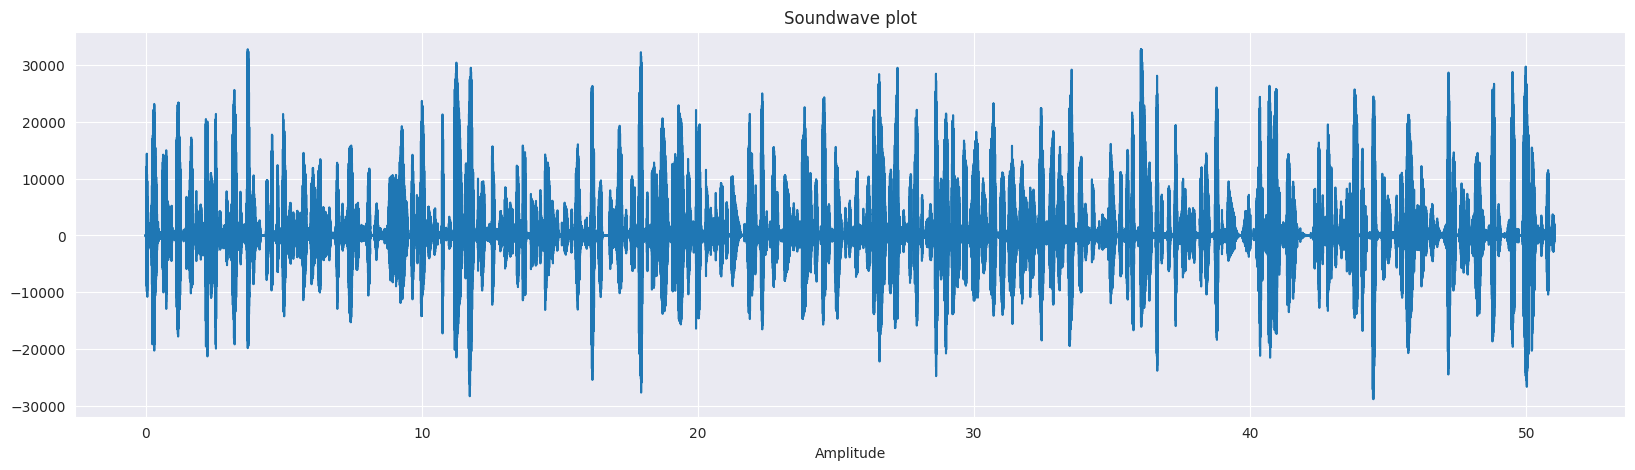

In [51]:
plt.figure(figsize = (20, 5))
plt.plot(timestamps, signal)
plt.title("Soundwave plot")
plt.xlabel("Time (seconds)")
plt.xlabel("Amplitude")
plt.show()

In [52]:
recognizer = sr.Recognizer()
# Load the audio
audio_file = sr.AudioFile(audiofile)

with audio_file as source:
    # Ambient noise adjustement
    recognizer.adjust_for_ambient_noise(source,
                                        duration = 0.5)
    # Record the audio
    audio = recognizer.record(source,
                              duration = 5, # To consider until a specific time (in seconds and to be passed as float)
                              offset = None) # To exlucde the first part (in seconds and to be passed as float)

In [53]:
# 300 is the volume of the audio to be considered speech
#recognizer.energy_threshold = 300

recognizer.recognize_google(audio,
                            language = "en-US", # To be set manually
                            show_all = True) # To prevent errors in case of 0 words recognized

{'alternative': [{'transcript': 'but what if somebody decides to break it be careful that you keep adequate coverage but',
   'confidence': 0.98700941},
  {'transcript': 'but what if somebody decides to break it be careful that you keep adequate coverage butt',
   'confidence': 0.98700941},
  {'transcript': 'but what if somebody decides to brake it be careful that you keep adequate coverage but',
   'confidence': 0.98700941},
  {'transcript': 'but what if somebody decides to break it be careful that you keep adequate coverage Bhatt',
   'confidence': 0.98700941},
  {'transcript': 'but what if somebody decides to break it be careful that you keep adequate coverage buts',
   'confidence': 0.98700941}],
 'final': True}

In [54]:
"""
# Multiple speakers case
recognizer = sr.Recognizer()

# Multiple speakers on different files
speakers = [sr.AudioFile("speaker_0.wav"),
            sr.AudioFile("speaker_1.wav"),
            sr.AudioFile("speaker_2.wav")]

# Transcribe each speaker individually
for i, speaker in enumerate(speakers):
    with speaker as source:
        speaker_audio = recognizer.record(source)
    print(f"Text from speaker {i}:")
    print(recognizer.recognize_google(speaker_audio,
         							  language="en-US"))
"""

'\n# Multiple speakers case\nrecognizer = sr.Recognizer()\n\n# Multiple speakers on different files\nspeakers = [sr.AudioFile("speaker_0.wav"),\n            sr.AudioFile("speaker_1.wav"),\n            sr.AudioFile("speaker_2.wav")]\n\n# Transcribe each speaker individually\nfor i, speaker in enumerate(speakers):\n    with speaker as source:\n        speaker_audio = recognizer.record(source)\n    print(f"Text from speaker {i}:")\n    print(recognizer.recognize_google(speaker_audio,\n         \t\t\t\t\t\t\t  language="en-US"))\n'

In [55]:
# Audio file manipulation

#as_file = AudioSegment.from_file(file = audiofile) # For format different from wav, it would be necessary to use ffmpeg

# Increase the audio (10 dB increase) to help the model recognize it
#as_file = audio + 10

# Remove the static start (first five seconds)
#as_file[5000:]

#from pydub.effects import normalize # To normalize the audio e balance louder moments to more silent moments

#balanced_audio = normalize(as_file)
#play(balanced_audio)

# To combine two audio files and increase their volume of 10 dB
#audio_file_r = audio_file_1 + audio_file_2 + 10

# Split a stereo file into mono files
#as_file_channels = as_file.split_to_mono() # Returns a list containing each channel

In [56]:
# Audio file convertion and export

#as_file = AudioSegment.from_file(file = audiofile) # For format different from wav, it would be necessary to use ffmpeg

#as_file.export(out_f = "audiofile.wav", format = "mp3")

In [57]:
# General stat heleper functions

# Create function to convert audio file to wav
def convert_to_wav(filename):
  """Takes an audio file of non .wav format and converts to .wav"""
  # Import audio file
  audio = AudioSegment.from_file(filename)

  # Create new filename
  new_filename = filename.split(".")[0] + ".wav"

  # Export file as .wav
  audio.export(new_filename, format="wav")
  print(f"Converting {filename} to {new_filename}...")

def show_pydub_stats(filename):
  """Returns different audio attributes related to an audio file."""
  # Create AudioSegment instance
  audio_segment = AudioSegment.from_file(filename)

  # Print audio attributes and return AudioSegment instance
  print(f"Channels: {audio_segment.channels}")
  print(f"Sample width: {audio_segment.sample_width}")
  print(f"Frame rate (sample rate): {audio_segment.frame_rate}")
  print(f"Frame width: {audio_segment.frame_width}")
  print(f"Length (ms): {len(audio_segment)}")
  return audio_segment

def transcribe_audio(filename):
  """Takes a .wav format audio file and transcribes it to text."""
  # Setup a recognizer instance
  recognizer = sr.Recognizer()

  # Import the audio file and convert to audio data
  audio_file = sr.AudioFile(filename)
  with audio_file as source:
    audio_data = recognizer.record(source)

  # Return the transcribed text
  return recognizer.recognize_google(audio_data)

In [58]:
# NER on the audio file

import spacy

# Transcribe call 4 channel 2
call_4_channel_2_text = transcribe_audio("call_4_channel_2.wav")

# Create a spaCy language model instance
nlp = spacy.load("en_core_web_sm")

# Create a spaCy doc with call 4 channel 2 text
doc = nlp(call_4_channel_2_text)

# Check the type
print(type(doc))

# Show tokens in doc
for token in doc:
    print(token.text, token.idx)

# Show sentences in doc
for sentence in doc.sents:
    print(sentence)

# Show named entities and their labels
for entity in doc.ents:
    print(entity.text, entity.label_)

# Import EntityRuler class
from spacy.pipeline import EntityRuler

# Create EntityRuler instance
ruler = EntityRuler(nlp)

# Define pattern for new entity
ruler.add_patterns([{"label": "PRODUCT", "pattern": "smartphone"}])

# Update existing pipeline
nlp.add_pipe(ruler, before="ner")

# Test new entity
for entity in doc.ents:
  print(entity.text, entity.label_)

FileNotFoundError: [Errno 2] No such file or directory: 'call_4_channel_2.wav'

# NLP feature enginering

In [ ]:
# Print the features of df1
#print(df1.columns)

# Perform one-hot encoding
#df1 = pd.get_dummies(df1, columns=['feature 5'])

# Print the new features of df1
#print(df1.columns)

# Print first five rows of df1
#print(df1.head())

In [ ]:
!pip install textatistic

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for textatistic: filename=textatistic-0.0.1-py3-none-any.whl size=29047 sha256=8ac51c5dbf7dbde181a2bb7b7b4d19af9541e2e966067192c76f9f8d4fae8a7f
  Stored in directory: /root/.cache/pip/wheels/6e/31/c3/df8af4aa9ec3f671b0e8bc3bfa642c75918f2479ca4050f5f4
  Created wheel for pyhyphen: filename=PyHyphen-4.0.3-cp37-abi3-linux_x86_64.whl size=64705 sha256=5a71c2b29cc9a08cb53cdc86947ef74a1072b9186ab7ca0e87f2d1479c86dddb
  Stored in directory: /root/.cache/pip/wheels/5e/8e/2c/099292ddfe67d4168785f44109ee79131c652ee5bdd66502b8
Successfully built textatistic pyhyphen


In [ ]:
# Readability measure

from textatistic import Textatistic

text_1 = "This is an example sentence."
text_2 = "Here it is a phrase which constitutes an instance."

Textatistic(text_1).scores, Textatistic(text_2).scores

({'flesch_score': 66.40000000000003,
  'fleschkincaid_score': 5.240000000000002,
  'gunningfog_score': 10.0,
  'smog_score': 8.841846274778883,
  'dalechall_score': 7.0424999999999995},
 {'flesch_score': 84.90000000000003,
  'fleschkincaid_score': 3.653333333333334,
  'gunningfog_score': 8.044444444444444,
  'smog_score': 8.841846274778883,
  'dalechall_score': 9.346233333333334})

In [ ]:
# Metrics that can be used or NLP
# Cosine similarity
# from sklearn.metrics.pairwise import cosine_similarity

# All metrics and models usually capture the word similarities, while being not able to catch
# context and sentiment differences. For this last property, specific models or word
# embeddings must be used (SpaCy pre-trained model are an example)